In [190]:
import numpy as np
import pandas
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [191]:
plt.style.use("fivethirtyeight")

# Input Cells

In [192]:
demography = pd.read_excel('data/all.xlsx')

In [193]:
demography.drop_duplicates('ID', inplace=True)

In [194]:
demography = demography.drop('ID', axis=1)

# Weekly income + Quality

In [195]:
# demography[demography['Favourite category'] == 'Asian cuisine'].mode()

In [196]:
demography.groupby('Favourite category').mean()

,Age,Weekly income,Preferred quality
Favourite category,,,
Asian cuisine,51.770992,73.664122,0.428092
Czech cuisine,53.803681,57.042945,0.394785
Italian cuisine,51.942029,82.623188,0.432101


In [197]:
demography.groupby('Favourite category').median()

,Age,Weekly income,Preferred quality
Favourite category,,,
Asian cuisine,50.0,44.0,0.38
Czech cuisine,55.0,39.0,0.34
Italian cuisine,53.0,44.0,0.37


# Favourite category

In [198]:
demography.value_counts('Favourite category')

Favourite category
Czech cuisine      163
Italian cuisine    138
Asian cuisine      131
dtype: int64

<AxesSubplot:ylabel='None'>

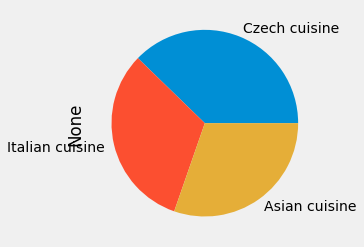

In [199]:
demography.value_counts('Favourite category').plot(kind='pie')

# Ad Type

In [200]:
demography.value_counts('Favourite ad type')

Favourite ad type
promo stand big          212
citylight                 61
print-on-bus              61
promo stand small         36
hostess on the street     30
billboard                 28
radio spot                 4
dtype: int64

# Ad Type by Category (Asia, Czechia, Italia)

In [201]:
cat_ad_graph = demography[['Favourite ad type', 'Favourite category']].groupby('Favourite ad type').value_counts()\
    .unstack()

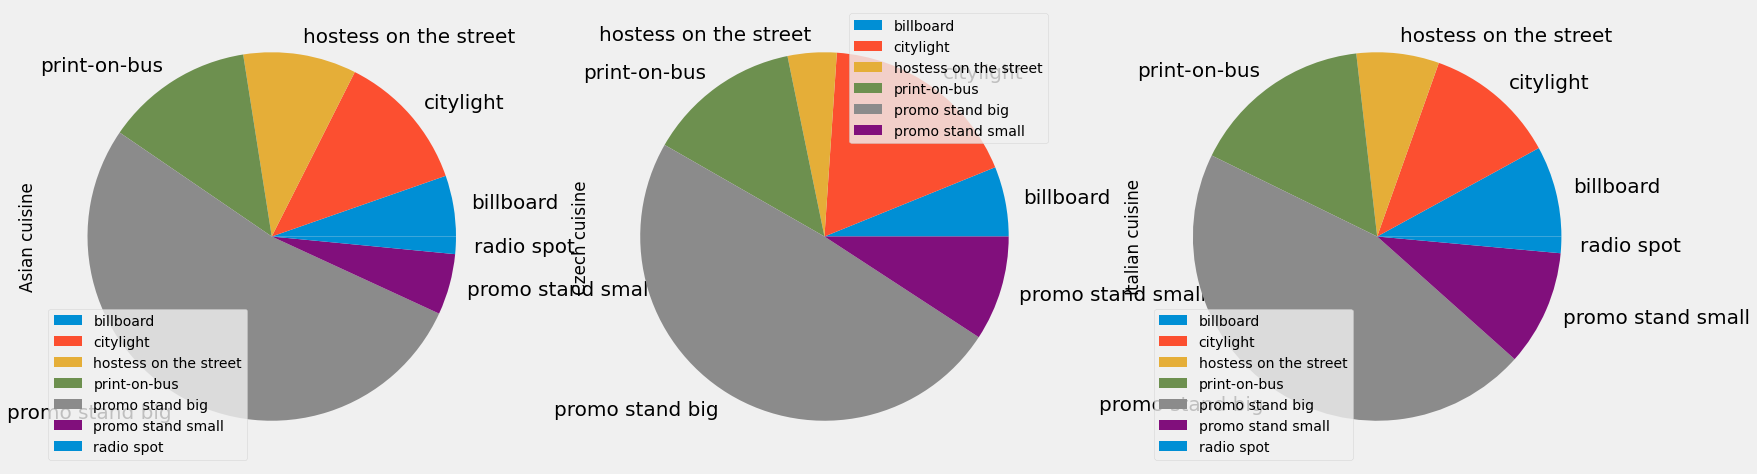

In [202]:
cat_ad_graph.plot(subplots=True, kind='pie', figsize=(25,25), fontsize=20);

In [203]:
asian = cat_ad_graph['Asian cuisine'].reset_index()

In [204]:
czech = cat_ad_graph['Czech cuisine'].reset_index()

In [205]:
italia =  cat_ad_graph['Italian cuisine'].reset_index()

#================================================

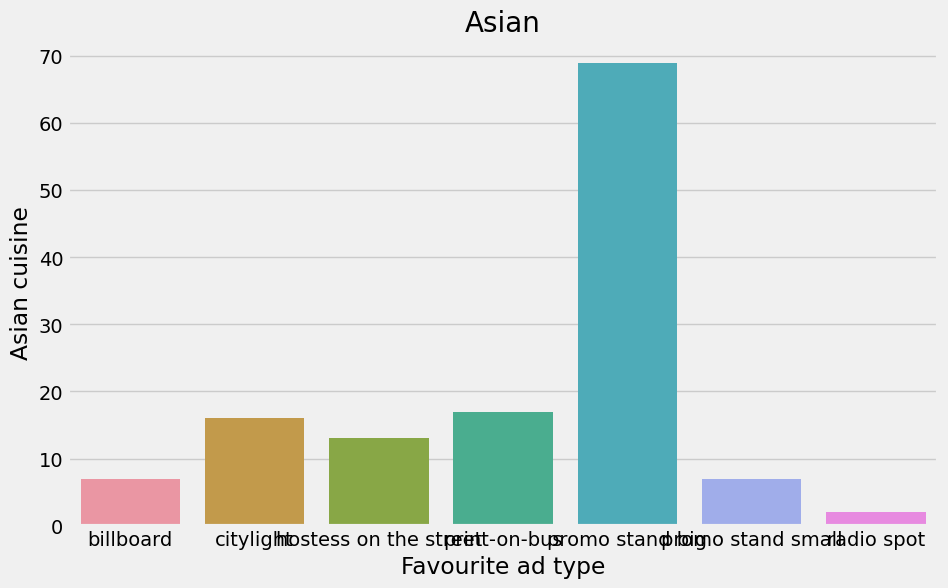

In [206]:
plt.figure(figsize=(10,6), dpi=100)
sns.barplot(data=asian, x='Favourite ad type', y='Asian cuisine')
plt.title('Asian', fontsize=20);

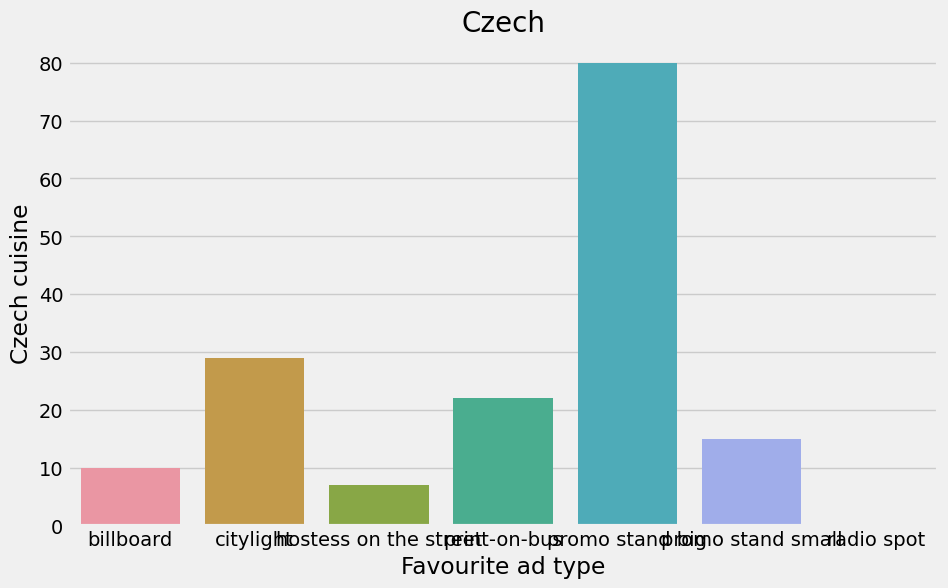

In [207]:
plt.figure(figsize=(10,6), dpi=100)
sns.barplot(data=czech, x='Favourite ad type', y='Czech cuisine')
plt.title('Czech', fontsize=20);

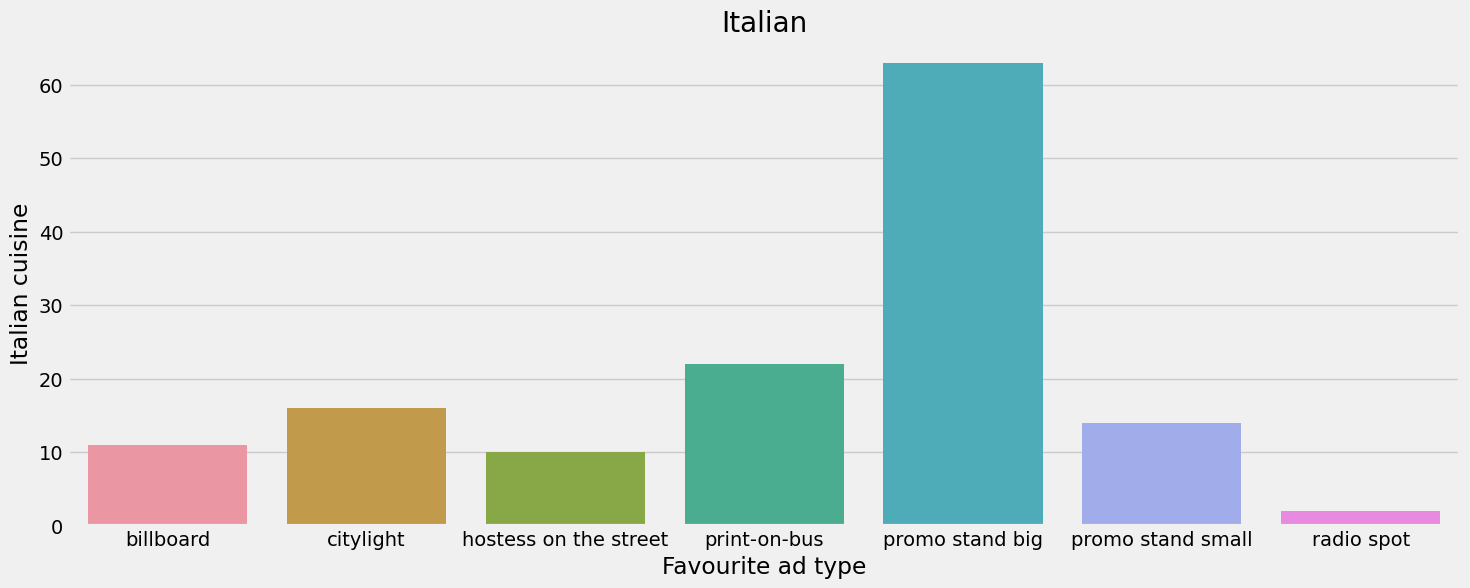

In [226]:
plt.figure(figsize=(16,6), dpi=100)
sns.barplot(data=italia, x='Favourite ad type', y='Italian cuisine')
plt.title('Italian', fontsize=20);

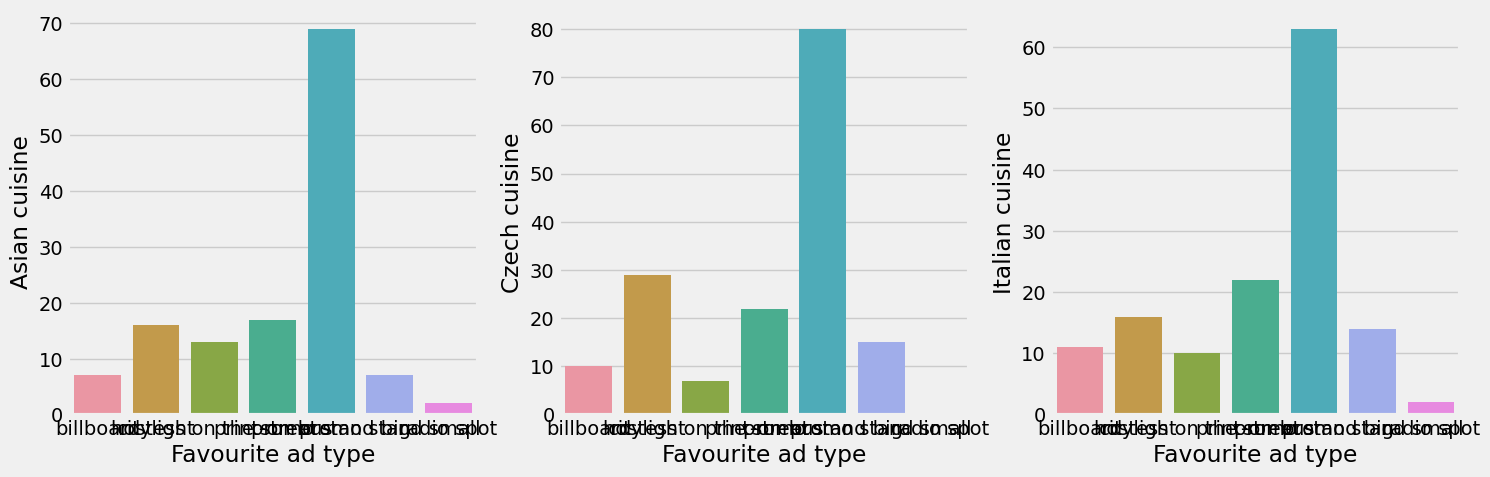

In [209]:
fig, axes = plt.subplots(ncols=3, figsize=(16,5), dpi=100)

sns.barplot(data=asian, x='Favourite ad type', y='Asian cuisine', ax=axes[0])
sns.barplot(data=czech, x='Favourite ad type', y='Czech cuisine', ax=axes[1])
sns.barplot(data=italia, x='Favourite ad type', y='Italian cuisine', ax=axes[2]);

# Более точная выборка дней по кухне и рекламе

In [210]:
cuisine_cz = demography['Favourite category'] == 'Czech cuisine'
cuisine_as = demography['Favourite category'] == 'Asian cuisine'
cuisine_it = demography['Favourite category'] == 'Italian cuisine'

In [211]:
ad = demography['Favourite ad type'] == 'promo stand big'

In [224]:
demography[cuisine_cz & ad][['Weekly income', 'Preferred quality']].describe()

,Weekly income,Preferred quality
count,63.000000,63.000000
mean,67.841270,0.412698
std,54.947836,0.168209
min,24.000000,0.210000
25%,32.000000,0.270000
50%,43.000000,0.350000
75%,89.500000,0.530000
max,341.000000,0.840000


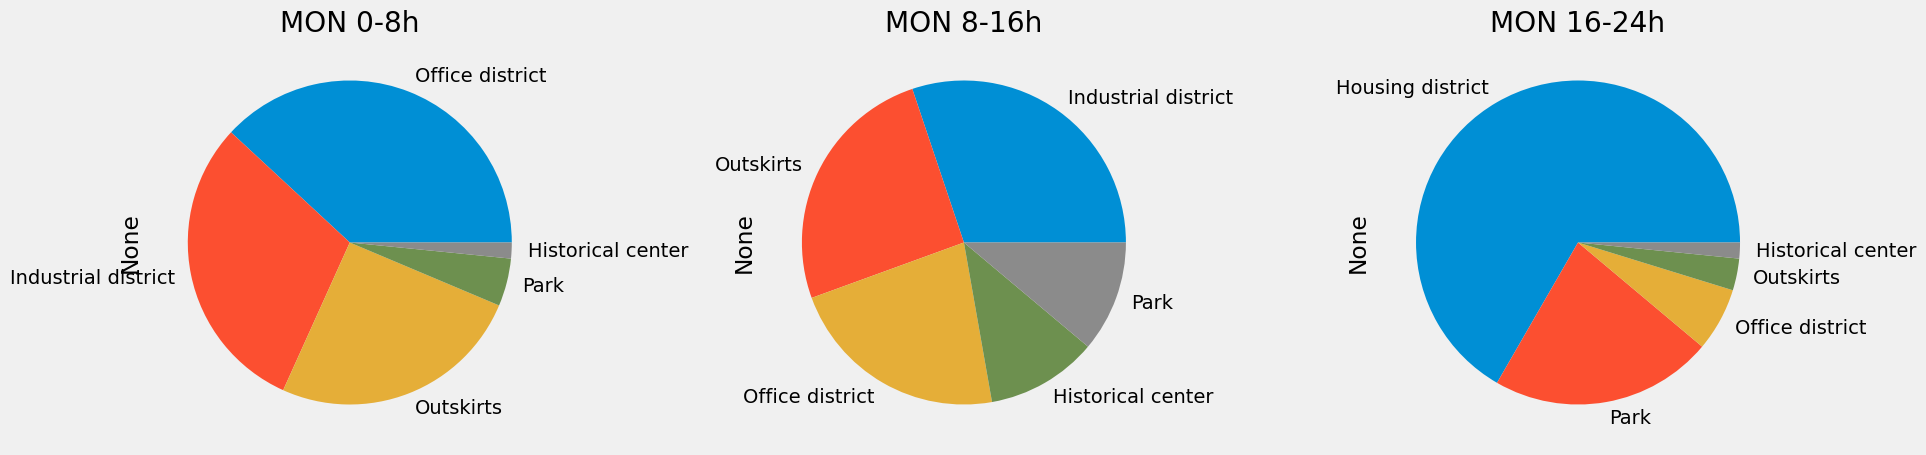

In [212]:
mon, axes = plt.subplots(ncols=3, figsize=(20,5), dpi=100)
demography[cuisine_cz & ad].value_counts('MON 0-8h').plot(kind='pie', ax=axes[0], title='MON 0-8h')
demography[cuisine_cz & ad].value_counts('MON 8-16h').plot(kind='pie',ax=axes[1], title='MON 8-16h')
demography[cuisine_cz & ad].value_counts('MON 16-24h').plot(kind='pie', ax=axes[2], title='MON 16-24h');

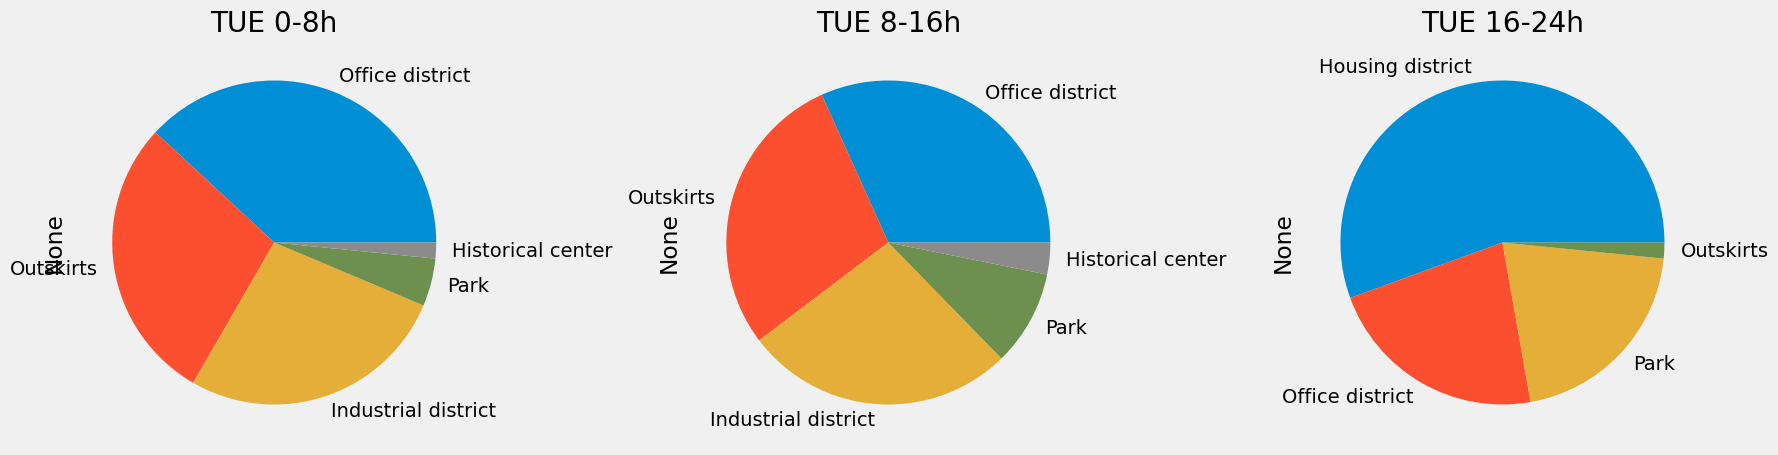

In [213]:
tue, axes = plt.subplots(ncols=3, figsize=(20,5), dpi=100)
demography[cuisine_cz & ad].value_counts('TUE 0-8h').plot(kind='pie', ax=axes[0], title='TUE 0-8h')
demography[cuisine_cz & ad].value_counts('TUE 8-16h').plot(kind='pie',ax=axes[1], title='TUE 8-16h')
demography[cuisine_cz & ad].value_counts('TUE 16-24h').plot(kind='pie', ax=axes[2], title='TUE 16-24h');

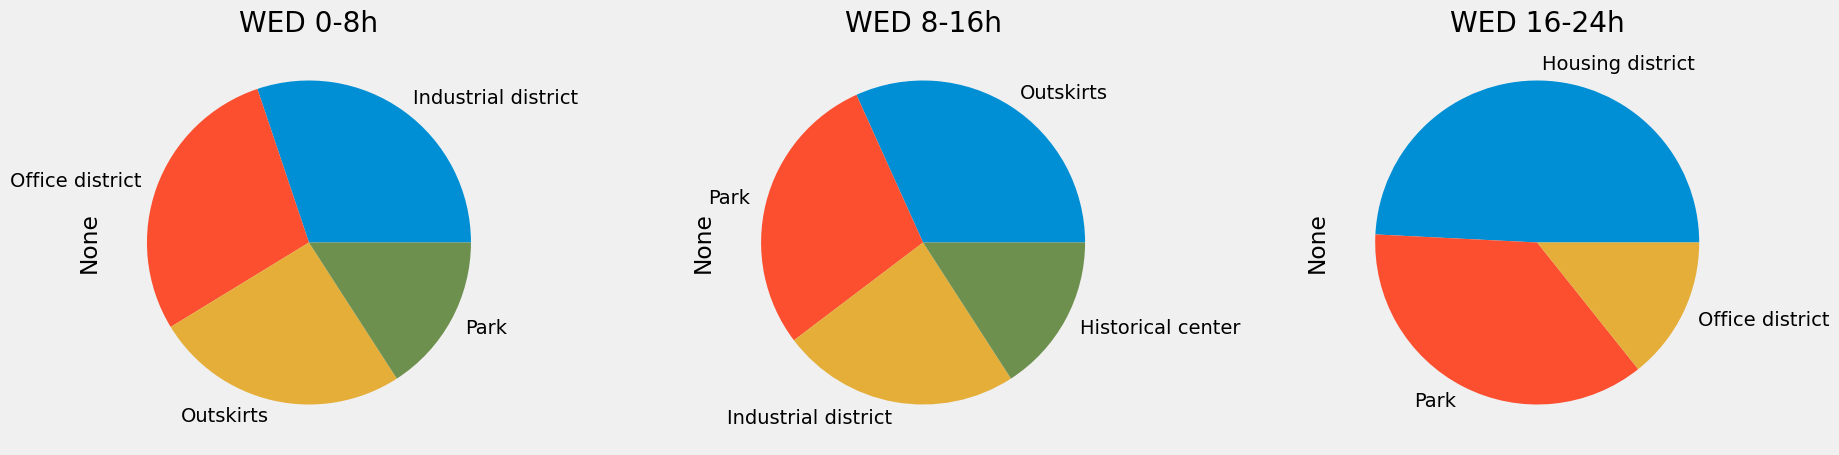

In [214]:
wed, axes = plt.subplots(ncols=3, figsize=(20,5), dpi=100)
demography[cuisine_cz & ad].value_counts('WED 0-8h').plot(kind='pie', ax=axes[0], title='WED 0-8h')
demography[cuisine_cz & ad].value_counts('WED 8-16h').plot(kind='pie',ax=axes[1], title='WED 8-16h')
demography[cuisine_cz & ad].value_counts('WED 16-24h').plot(kind='pie', ax=axes[2], title='WED 16-24h');

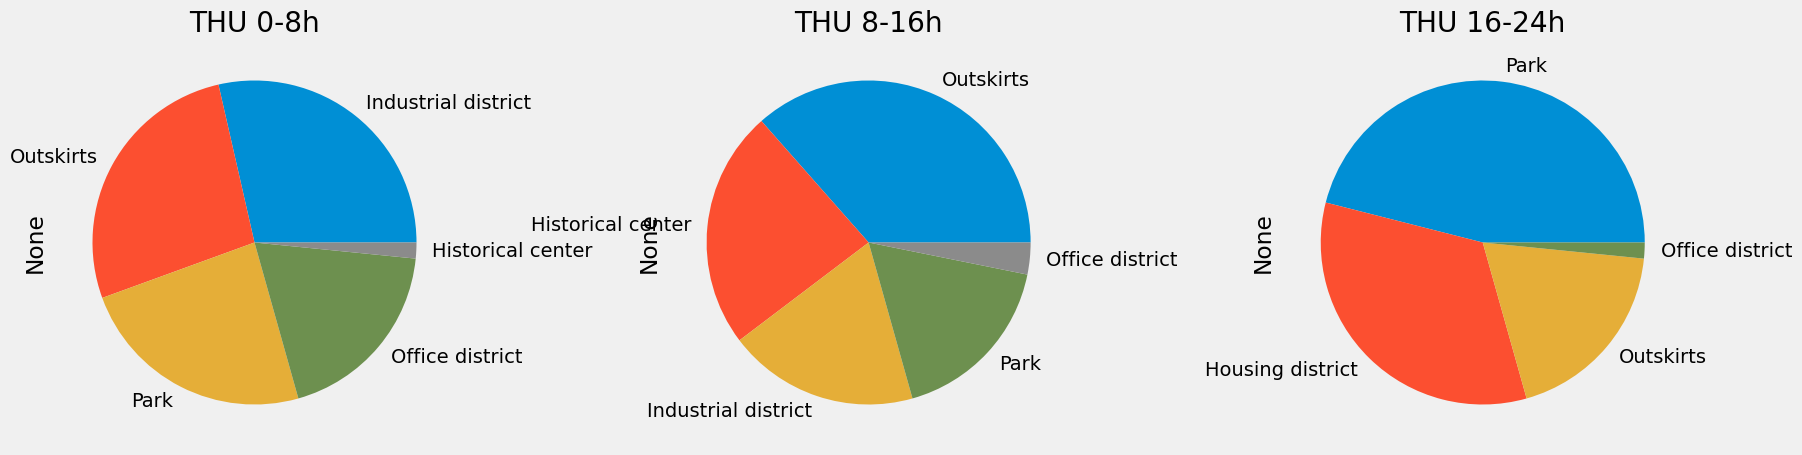

In [215]:
thu, axes = plt.subplots(ncols=3, figsize=(20,5), dpi=100)
demography[cuisine_cz & ad].value_counts('THU 0-8h').plot(kind='pie', ax=axes[0], title='THU 0-8h')
demography[cuisine_cz & ad].value_counts('THU 8-16h').plot(kind='pie',ax=axes[1], title='THU 8-16h')
demography[cuisine_cz & ad].value_counts('THU 16-24h').plot(kind='pie', ax=axes[2], title='THU 16-24h');

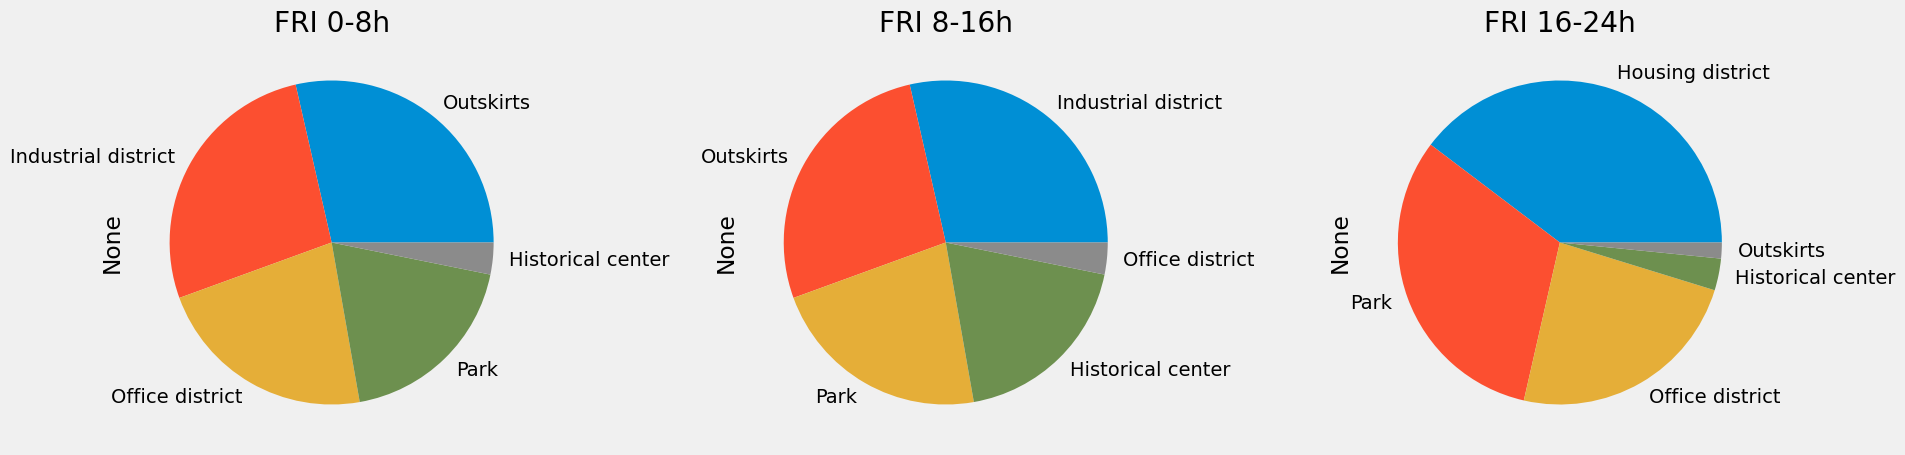

In [216]:
fri, axes = plt.subplots(ncols=3, figsize=(20,5), dpi=100)
demography[cuisine_cz & ad].value_counts('FRI 0-8h').plot(kind='pie', ax=axes[0], title='FRI 0-8h')
demography[cuisine_cz & ad].value_counts('FRI 8-16h').plot(kind='pie',ax=axes[1], title='FRI 8-16h')
demography[cuisine_cz & ad].value_counts('FRI 16-24h').plot(kind='pie', ax=axes[2], title='FRI 16-24h');

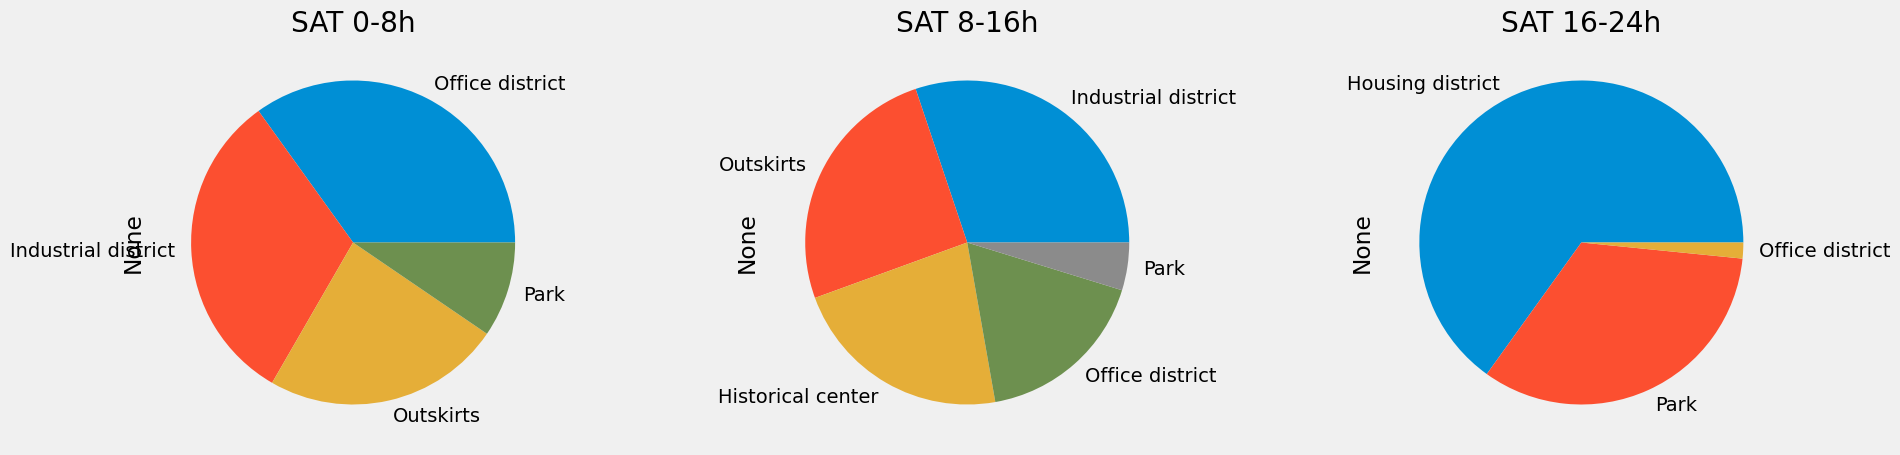

In [217]:
sat, axes = plt.subplots(ncols=3, figsize=(20,5), dpi=100)
demography[cuisine_cz & ad].value_counts('SAT 0-8h').plot(kind='pie', ax=axes[0], title='SAT 0-8h')
demography[cuisine_cz & ad].value_counts('SAT 8-16h').plot(kind='pie',ax=axes[1], title='SAT 8-16h')
demography[cuisine_cz & ad].value_counts('SAT 16-24h').plot(kind='pie', ax=axes[2], title='SAT 16-24h');

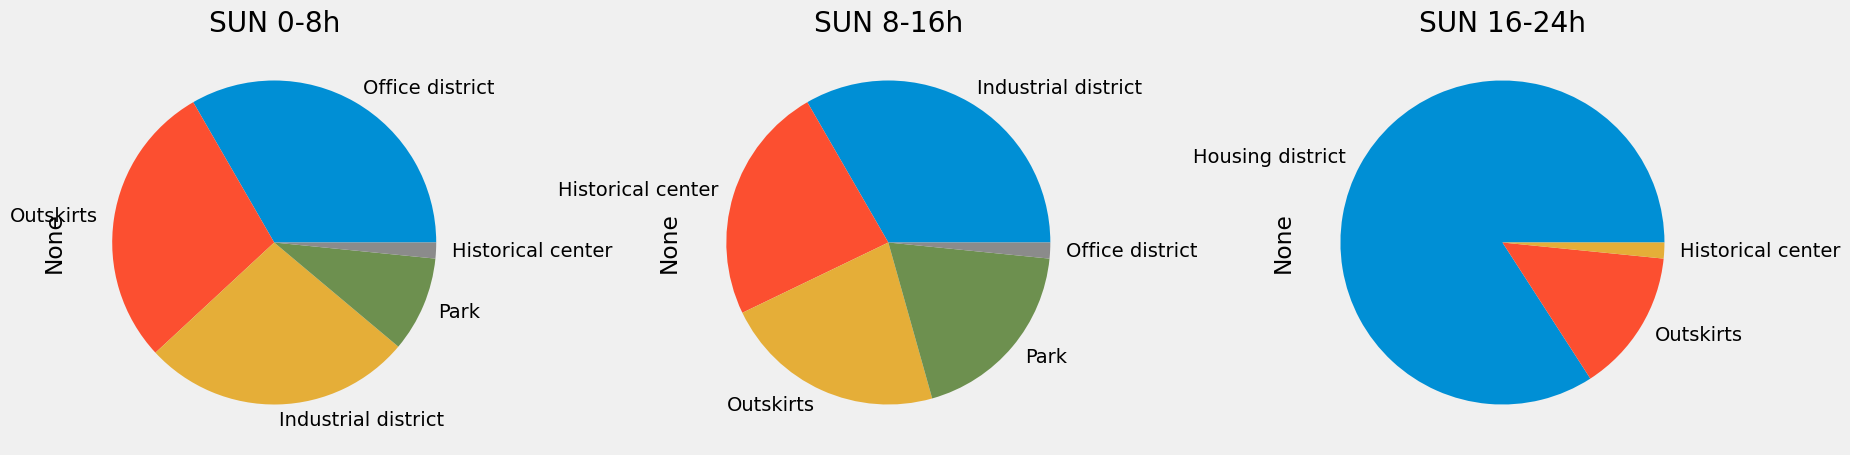

In [218]:
sun, axes = plt.subplots(ncols=3, figsize=(20,5), dpi=100)
demography[cuisine_cz & ad].value_counts('SUN 0-8h').plot(kind='pie', ax=axes[0], title='SUN 0-8h')
demography[cuisine_cz & ad].value_counts('SUN 8-16h').plot(kind='pie',ax=axes[1], title='SUN 8-16h')
demography[cuisine_cz & ad].value_counts('SUN 16-24h').plot(kind='pie', ax=axes[2], title='SUN 16-24h');

C:\Users\utikp\AppData\Local\Temp\ipykernel_10372\3228349922.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cz_df[demography['Favourite ad type'] == 'promo stand big'].describe()


,Age,Weekly income,Preferred quality
count,80.000000,80.00000,80.000000
mean,52.612500,55.23750,0.393375
std,21.694947,34.99629,0.153869
min,15.000000,24.00000,0.210000
25%,36.000000,34.75000,0.280000
50%,50.000000,41.00000,0.350000
75%,72.500000,76.25000,0.475000
max,90.000000,247.00000,0.910000


# WIP

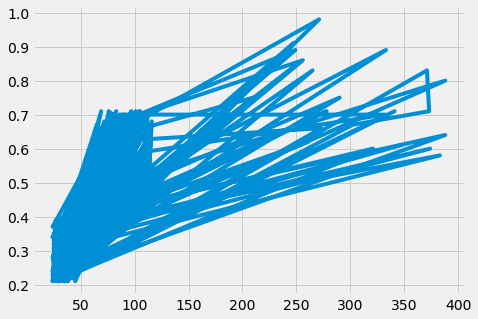

In [221]:
fig = plt.figure()
ax1 = fig.add_axes([0,0,1,1])
ax1.plot(demography['Weekly income'], demography['Preferred quality'])

In [222]:
demography.groupby(['Favourite category']).describe(include=['object'])

Name                 Gender                      \
                   count unique top freq  count unique     top freq   
Favourite category                                                    
Asian cuisine        131    119  CC    3    131      2  Female   68   
Czech cuisine        163    134  ZP    3    163      2    Male   88   
Italian cuisine      137    119  JJ    3    138      2  Female   81   

                   Favourite ad type         ...             SUN 0-8h       \
                               count unique  ...                  top freq   
Favourite category                           ...                             
Asian cuisine                    131      7  ...      Office district   34   
Czech cuisine                    163      6  ...  Industrial district   62   
Italian cuisine                  138      7  ...            Outskirts   38   

                   SUN 8-16h                                  SUN 16-24h  \
                       count unique                  top freq      count   
Favourite category                                                         
Asian cuisine            131      5            Outskirts   40        131   
Czech cuisine            163      5            Outskirts   61        163   
Italian cuisine          138      5  Industrial district   37        138   

                                                  
                   unique               top freq  
Favourite category                                
Asian cuisine           4  Housing district   95  
Czech cuisine           4  Housing district  137  
Italian cuisine         5  Housing district  103  

[3 rows x 96 columns]